In [ ]:
import torch
import sys
import numpy as np
import pylab as plt
import openslide as ops

sys.path.append('../')
from Model.PatchCNN import PatchCNN
from Data.CRLM import CRLM
from Load_trained.process_large_patches import process_large_image
from Data.get_dataloader import get_dataloader

In [ ]:
model

In [ ]:
device = torch.device("cuda:0")
num_layers = [3,4,6,3]  # res34
#num_layers = [2,2,2,2] # res18
dropout_rate = 0
#dilation = 2
model = PatchCNN(layers=num_layers,dropout_rate=dropout_rate)
state_dict = torch.load('/mnt/DATA_CRLM/Patches/Checkpoints/PatchCNN/Legacy/PatchCNN_448_res34/PatchCNN_best.pth')
#state_dict = torch.load('/mnt/DATA_CRLM/Patches/Checkpoints/PatchCNN/PatchCNN_448_res18/PatchCNN_best.pth')
new_state_dict = {}
for key in model.state_dict():
    new_state_dict[key] = state_dict['module.'+key].double()
model.load_state_dict(new_state_dict)
# model.eval()
# model.to(device)

In [ ]:
import os
path = '/home/zyx31/DATA_CRLM/Patches/Patches_Level0/Patches_448/All/'
flist = os.listdir(path)

tindex = 0

tim = plt.imread(path+flist[tindex])
plt.imshow(tim[:,:,(2,1,0)])
plt.axis('off')
#tt = torch.from_numpy(((tim[:patch_size,:patch_size,(0,1,2)]-np.array([0.485, 0.456, 0.406]))/ np.array([0.229, 0.224, 0.225])).transpose(2,0,1)).float()
tt = torch.from_numpy(((tim[:,:,]/255.0-np.array([0.485, 0.456, 0.406]))/ np.array([0.229, 0.224, 0.225])).transpose(2,0,1)).float()

model.eval()
model.cuda()
out = model(tt.unsqueeze(0).cuda())

print(out.argmax(1))

In [ ]:
dl = get_dataloader(batch_size=1,patch_size=448,root_dir='/mnt/DATA_CRLM/Patches/Patches_Level0/Patches_448/All/')
#sample = dl.dataset[9][0].numpy()
a,b = iter(dl).next()
plt.figure(figsize=[5,5])
plt.imshow(a[0,:,:,:].numpy().transpose(1,2,0)/3+np.array([0.406, 0.485, 0.456, ]))
plt.show()

In [ ]:
tim = plt.imread('/home/zyx31/DATA_CRLM/Patches/Patches_hier/screen_shot_17446.png')
patch_size = 1120
nimg =tim[-patch_size:,-patch_size:,(2,1,0)]
#tt = torch.from_numpy(((tim[:patch_size,:patch_size,(0,1,2)]-np.array([0.485, 0.456, 0.406]))/ np.array([0.229, 0.224, 0.225])).transpose(2,0,1)).float()
tt = torch.from_numpy(((nimg-np.array([0.485, 0.456, 0.406]))/ np.array([0.229, 0.224, 0.225])).transpose(2,0,1)).float()
model.eval()
model.to(device)

print(tt.shape)
out = model(tt.unsqueeze(0).cuda())

plt.subplot(1,2,1)
plt.imshow(nimg)
print(out.shape)
print(out.argmax(1))
plt.subplot(1,2,2)
plt.imshow(out.argmax(1)[0])

In [ ]:
model.cuda()
out = process_large_image(model,nimg,step=224)
print(out.shape)

plt.subplot(1,2,1)
plt.imshow(nimg)


plt.subplot(1,2,2)

plt.imshow(out.argmax(2))
print(out.argmax(2))

In [ ]:
plt.imshow(nimg[-448:,:448])
plt.axis('off')

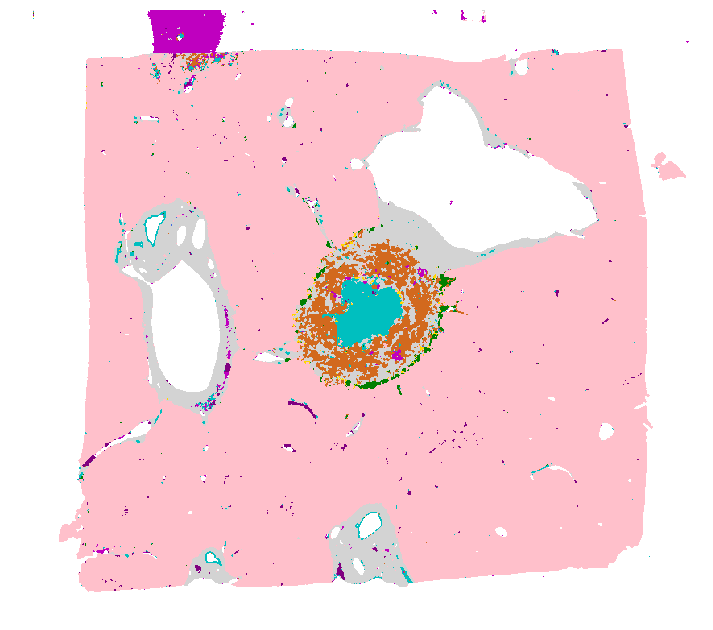

In [111]:
import numpy as np
from matplotlib.colors import ListedColormap
#'lightgrey','gold','m','purple','pink',
cMap = ListedColormap(['pink','c','lightgrey','chocolate','g','m','purple','royalblue','gold','w','c'])
wsi_results = np.load('/home/zyx31/DATA_CRLM/CRLM/Results/WR_lev0ps448_stp_128/wsi_41.npy')
fresult = np.array(wsi_results).argmax(2).T
for i in range(11):
    fresult[i,0] = i
fig=plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(fresult,cmap=cMap)


(tensor([[ 0.9088,  0.9986,  0.9787,  0.5749],
        [ 0.8080,  0.9850,  0.8076,  0.8368],
        [ 0.9226,  0.5138,  0.6469,  0.9820],
        [ 0.9998,  1.0000,  1.0000,  1.0000]], dtype=torch.float64), tensor([[ 2,  2,  2,  1],
        [ 2,  2,  2,  1],
        [ 3,  3,  3,  2],
        [ 3,  3,  3,  3]]))
tensor(1.00000e-02 *
       9.0909, dtype=torch.float64)


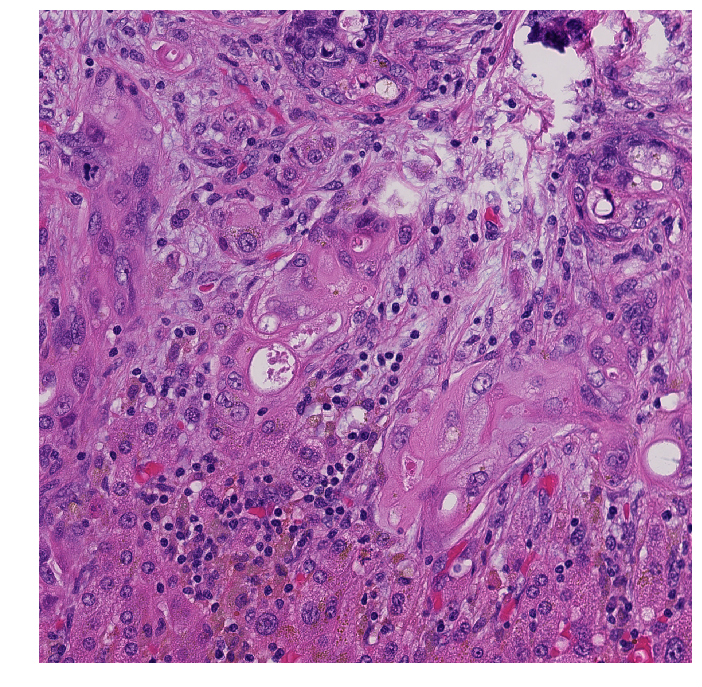

In [149]:
import openslide as ops
wsi  = ops.open_slide('/home/zyx31/DATA_CRLM/CRLM/Original/CRLM_041.ndpi')
sx,sy = 364,458
#print(fresult[sx:sx+2,sy:sy+2])
offset = 4
print(torch.max(torch.nn.functional.softmax(torch.from_numpy(wsi_results[sx:sx+offset,sy:sy+offset]),2),2))
timg = wsi.read_region((sx*128-224,sy*128-224),0,(448*offset,448*offset))
plt.figure(figsize=(12,12))
plt.imshow(timg)
plt.axis('off')
print(torch.mean(torch.nn.functional.softmax(torch.from_numpy(wsi_results[sx:sx+offset,sy:sy+offset]),2)[0]))

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
from Utils.fig2img import fig2img
#'lightgrey','gold','m','purple','pink',
cMap = ListedColormap(['pink','c','lightgrey','chocolate','g','r','purple','royalblue','gold','w'])


windex = 49

for windex in range(49,88):
    wsi_results = np.load('/home/zyx31/DATA_CRLM/CRLM/Results/WR_lev0ps448_stp_128/wsi_%d.npy'%windex)
    fresult = np.array(wsi_results).argmax(2).T
    for i in range(11):
        fresult[i,0] = i
    fig=plt.figure(figsize=(12,12))
    plt.axis('off')
    plt.imshow(fresult,cmap=cMap)
    figimg = fig2img(fig)
    figimg.save('/home/zyx31/DATA_CRLM/CRLM/Results/WR_lev0ps448_stp_128/wsi_%d.png'%windex)
    %clear